# MScFE 632 Machine Learning in Finance
# Group Work Project #1 - Computational Notebook

**Team Alpha Marketing Handbook**

This notebook contains all computational demonstrations for:
1. LASSO Regression
2. K-means Clustering
3. Principal Component Analysis (PCA)

---

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


---
## Part 1: LASSO Regression Computational Demonstration

### Scenario:
We will predict stock returns using multiple financial factors (momentum, value, size, volatility, etc.)
LASSO will help us identify the most important factors by performing automatic feature selection.

In [2]:
# Generate synthetic financial data
np.random.seed(42)
n_samples = 500
n_features = 20

# Create feature names representing financial factors
feature_names = [
    'Momentum_1M', 'Momentum_3M', 'Momentum_6M', 'Momentum_12M',
    'Value_PE', 'Value_PB', 'Value_PS', 'Value_Dividend',
    'Size_MarketCap', 'Size_Revenue', 'Liquidity_Volume', 'Liquidity_Turnover',
    'Volatility_30D', 'Volatility_90D', 'Beta', 'Leverage',
    'Profitability_ROE', 'Profitability_ROA', 'Growth_Revenue', 'Growth_Earnings'
]

# Generate features (normalized financial metrics)
X = np.random.randn(n_samples, n_features)

# Create target variable (stock returns) with only some features being truly important
# Only features 0, 2, 5, 8, 12, 14 have real impact (sparse solution)
true_coefficients = np.zeros(n_features)
true_coefficients[[0, 2, 5, 8, 12, 14]] = [2.5, -1.8, 1.2, -0.9, 1.5, -2.1]
y = X @ true_coefficients + np.random.randn(n_samples) * 0.5

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['Returns'] = y

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows of the dataset:")
print(df.head())
print(f"\nTarget variable (Returns) statistics:")
print(df['Returns'].describe())

Dataset shape: (500, 21)

First 5 rows of the dataset:
   Momentum_1M  Momentum_3M  Momentum_6M  Momentum_12M  Value_PE  Value_PB  \
0     0.496714    -0.138264     0.647689      1.523030 -0.234153 -0.234137   
1     1.465649    -0.225776     0.067528     -1.424748 -0.544383  0.110923   
2     0.738467     0.171368    -0.115648     -0.301104 -1.478522 -0.719844   
3    -0.479174    -0.185659    -1.106335     -1.196207  0.812526  1.356240   
4    -0.219672     0.357113     1.477894     -0.518270 -0.808494 -0.501757   

   Value_PS  Value_Dividend  Size_MarketCap  Size_Revenue  ...  \
0  1.579213        0.767435       -0.469474      0.542560  ...   
1 -1.150994        0.375698       -0.600639     -0.291694  ...   
2 -0.460639        1.057122        0.343618     -1.763040  ...   
3 -0.072010        1.003533        0.361636     -0.645120  ...   
4  0.915402        0.328751       -0.529760      0.513267  ...   

   Liquidity_Turnover  Volatility_30D  Volatility_90D      Beta  Leverage  \
0 

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 400
Test set size: 100


In [4]:
# Use LassoCV to find optimal alpha (regularization parameter)
alphas = np.logspace(-4, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print(f"Optimal alpha (λ) found: {lasso_cv.alpha_:.6f}")
print(f"Cross-validation R² score: {lasso_cv.score(X_train, y_train):.4f}")

Optimal alpha (λ) found: 0.013219
Cross-validation R² score: 0.9877


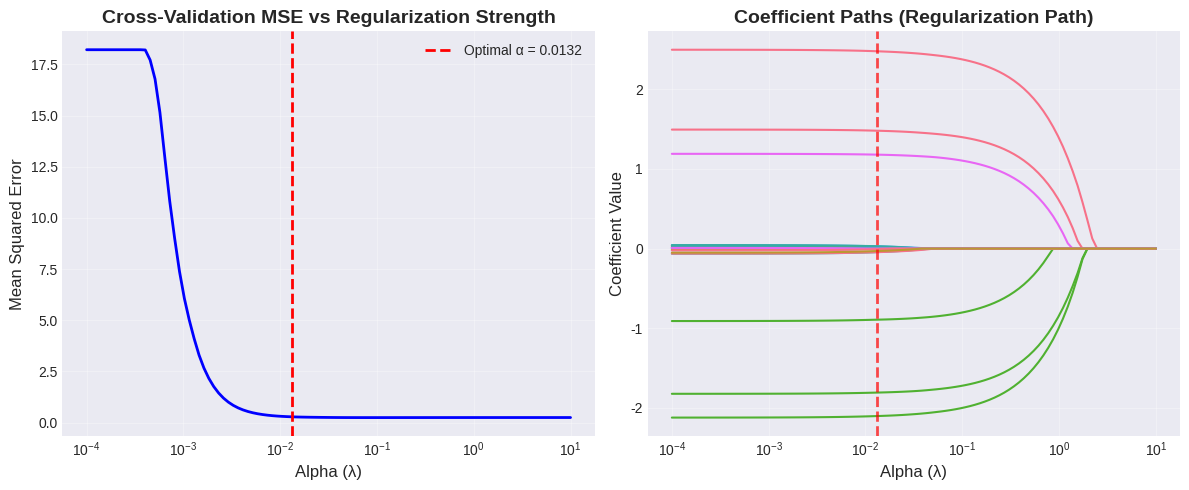


Interpretation: As alpha increases, coefficients shrink towards zero.
The optimal alpha balances bias-variance tradeoff for best predictive performance.


In [5]:
# Visualize CV scores vs alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, lasso_cv.mse_path_.mean(axis=1), 'b-', linewidth=2)
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', linewidth=2, 
            label=f'Optimal α = {lasso_cv.alpha_:.4f}')
plt.xlabel('Alpha (λ)', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Cross-Validation MSE vs Regularization Strength', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot coefficient paths
plt.subplot(1, 2, 2)
coef_path = []
for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    lasso_temp.fit(X_train, y_train)
    coef_path.append(lasso_temp.coef_)

coef_path = np.array(coef_path)
for i in range(n_features):
    plt.semilogx(alphas, coef_path[:, i], linewidth=1.5)
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', linewidth=2, alpha=0.7)
plt.xlabel('Alpha (λ)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Coefficient Paths (Regularization Path)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/user/lasso_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInterpretation: As alpha increases, coefficients shrink towards zero.")
print("The optimal alpha balances bias-variance tradeoff for best predictive performance.")

In [6]:
# Train final LASSO model with optimal alpha
lasso_final = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
lasso_final.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_final.predict(X_train)
y_test_pred = lasso_final.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n" + "="*60)
print("LASSO REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"\nTraining Set Performance:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"\nTest Set Performance:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print("\n" + "="*60)


LASSO REGRESSION MODEL PERFORMANCE

Training Set Performance:
  R² Score: 0.9877
  RMSE: 0.4730

Test Set Performance:
  R² Score: 0.9890
  RMSE: 0.4608



In [7]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_final.coef_,
    'Abs_Coefficient': np.abs(lasso_final.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

# Count non-zero coefficients
n_selected = np.sum(lasso_final.coef_ != 0)
n_zeroed = n_features - n_selected

print(f"\nFeature Selection Results:")
print(f"  Total features: {n_features}")
print(f"  Selected features (non-zero): {n_selected}")
print(f"  Eliminated features (zero): {n_zeroed}")
print(f"\nTop 10 Important Features:")
print(feature_importance.head(10).to_string(index=False))


Feature Selection Results:
  Total features: 20
  Selected features (non-zero): 14
  Eliminated features (zero): 6

Top 10 Important Features:
        Feature  Coefficient  Abs_Coefficient
    Momentum_1M     2.478169         2.478169
           Beta    -2.102074         2.102074
    Momentum_6M    -1.807275         1.807275
 Volatility_30D     1.480663         1.480663
       Value_PB     1.180087         1.180087
 Size_MarketCap    -0.892007         0.892007
       Value_PS    -0.044387         0.044387
   Momentum_12M    -0.043532         0.043532
Growth_Earnings    -0.030223         0.030223
   Size_Revenue     0.029876         0.029876


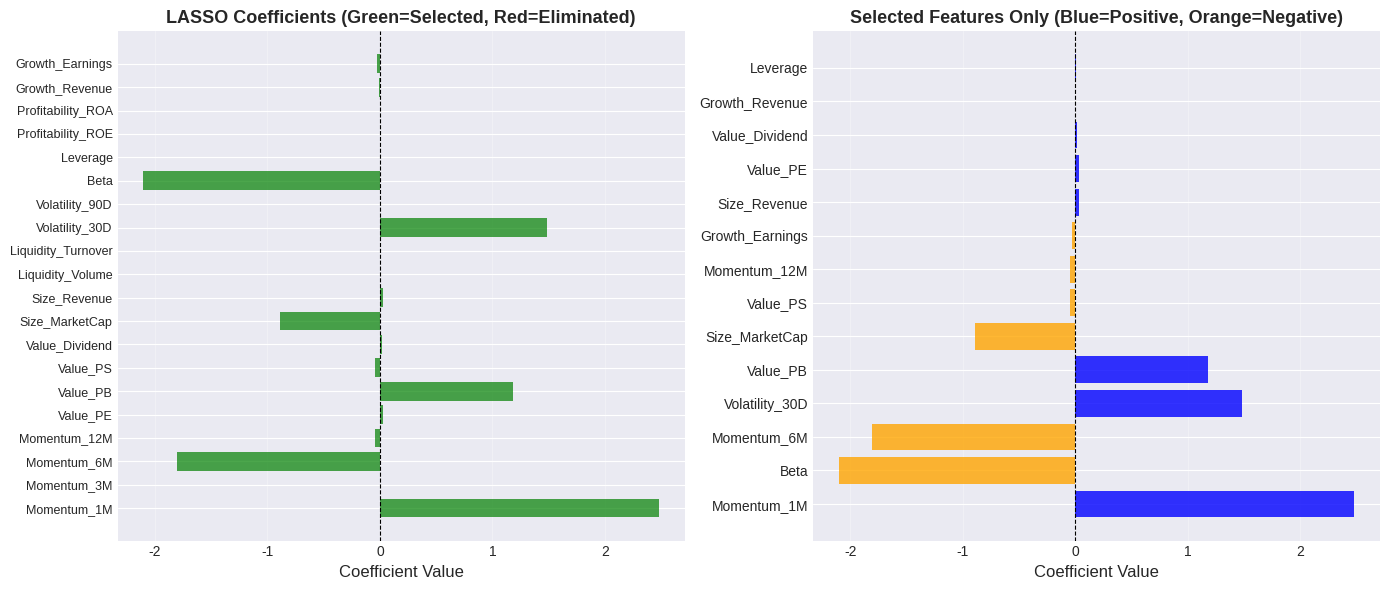

In [8]:
# Visualize feature importance
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
# Plot all coefficients
colors = ['green' if c != 0 else 'red' for c in lasso_final.coef_]
plt.barh(range(n_features), lasso_final.coef_, color=colors, alpha=0.7)
plt.yticks(range(n_features), feature_names, fontsize=9)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('LASSO Coefficients (Green=Selected, Red=Eliminated)', 
          fontsize=13, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True, alpha=0.3, axis='x')

plt.subplot(1, 2, 2)
# Plot only non-zero coefficients
selected_features = feature_importance[feature_importance['Abs_Coefficient'] > 0]
colors_selected = ['blue' if c > 0 else 'orange' 
                   for c in selected_features['Coefficient']]
plt.barh(range(len(selected_features)), selected_features['Coefficient'], 
         color=colors_selected, alpha=0.8)
plt.yticks(range(len(selected_features)), selected_features['Feature'], fontsize=10)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Selected Features Only (Blue=Positive, Orange=Negative)', 
          fontsize=13, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('/home/user/lasso_features.png', dpi=300, bbox_inches='tight')
plt.show()

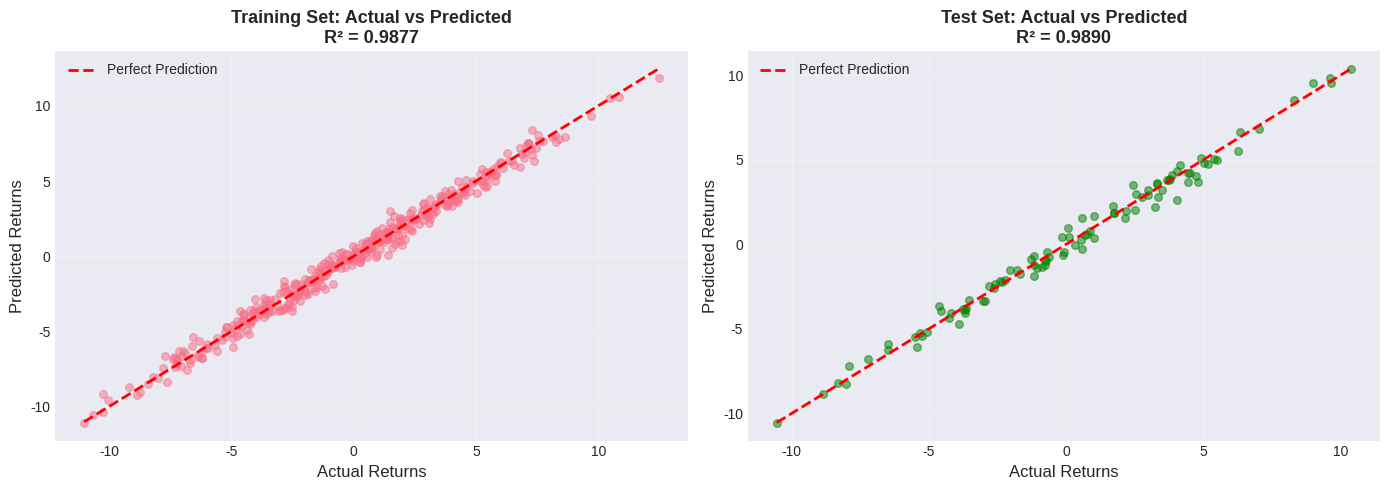


Key Insights:
1. LASSO successfully identified the most important factors for predicting returns
2. Reduced model complexity from 20 to 14 features
3. Maintained strong predictive performance while improving interpretability


In [9]:
# Prediction visualization
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, s=30)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Returns', fontsize=12)
plt.ylabel('Predicted Returns', fontsize=12)
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
          fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=30, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Returns', fontsize=12)
plt.ylabel('Predicted Returns', fontsize=12)
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
          fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/user/lasso_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insights:")
print("1. LASSO successfully identified the most important factors for predicting returns")
print(f"2. Reduced model complexity from {n_features} to {n_selected} features")
print("3. Maintained strong predictive performance while improving interpretability")

---
## Part 2: K-means Clustering Computational Demonstration

### Scenario:
We will cluster stocks based on their risk-return characteristics to create diversified portfolios.
K-means will help us identify natural groupings of stocks with similar investment profiles.

In [10]:
# Generate synthetic stock data
np.random.seed(42)
n_stocks = 300

# Create 4 natural clusters representing different investment styles
# Cluster 1: High return, High risk (Growth stocks)
cluster1 = np.random.randn(75, 2) * [0.02, 0.03] + [0.15, 0.25]

# Cluster 2: Low return, Low risk (Defensive stocks)
cluster2 = np.random.randn(75, 2) * [0.015, 0.02] + [0.05, 0.10]

# Cluster 3: Medium return, Medium risk (Balanced stocks)
cluster3 = np.random.randn(75, 2) * [0.018, 0.025] + [0.10, 0.18]

# Cluster 4: Negative return, High risk (Distressed stocks)
cluster4 = np.random.randn(75, 2) * [0.025, 0.035] + [-0.05, 0.28]

# Combine all clusters
stock_data = np.vstack([cluster1, cluster2, cluster3, cluster4])
true_labels = np.hstack([np.zeros(75), np.ones(75), np.full(75, 2), np.full(75, 3)])

# Create DataFrame
stocks_df = pd.DataFrame(stock_data, columns=['Annual_Return', 'Volatility'])
stocks_df['Stock_ID'] = [f'Stock_{i+1}' for i in range(n_stocks)]

# Add additional features
stocks_df['Sharpe_Ratio'] = stocks_df['Annual_Return'] / stocks_df['Volatility']
stocks_df['Market_Cap'] = np.random.lognormal(10, 1.5, n_stocks)

print(f"Dataset shape: {stocks_df.shape}")
print(f"\nFirst 10 stocks:")
print(stocks_df.head(10))
print(f"\nSummary statistics:")
print(stocks_df[['Annual_Return', 'Volatility', 'Sharpe_Ratio']].describe())

Dataset shape: (300, 5)

First 10 stocks:
   Annual_Return  Volatility  Stock_ID  Sharpe_Ratio     Market_Cap
0       0.159934    0.245852   Stock_1      0.650531   68561.259575
1       0.162954    0.295691   Stock_2      0.551095    5523.417244
2       0.145317    0.242976   Stock_3      0.598071   81178.757125
3       0.181584    0.273023   Stock_4      0.665088  168292.158754
4       0.140611    0.266277   Stock_5      0.528061   40951.853666
5       0.140732    0.236028   Stock_6      0.596250  367762.901034
6       0.154839    0.192602   Stock_7      0.803935    6900.272630
7       0.115502    0.233131   Stock_8      0.495436    3405.060359
8       0.129743    0.259427   Stock_9      0.500114    1528.312748
9       0.131840    0.207631  Stock_10      0.634971  207744.963062

Summary statistics:
       Annual_Return  Volatility  Sharpe_Ratio
count     300.000000  300.000000    300.000000
mean        0.062101    0.201605      0.376664
std         0.076186    0.072589      0.360310
m

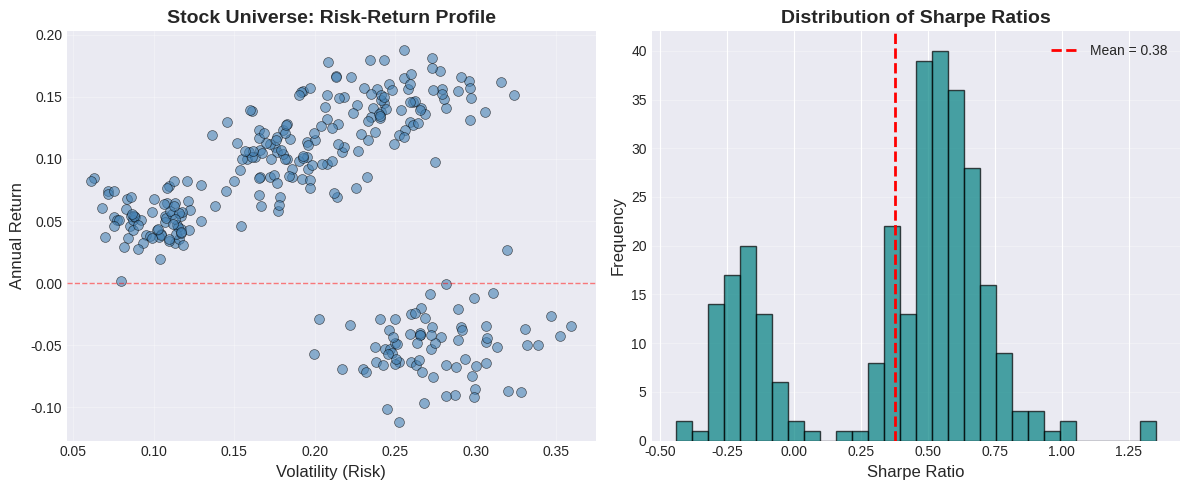

In [11]:
# Visualize the raw data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(stocks_df['Volatility'], stocks_df['Annual_Return'], 
            alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)
plt.xlabel('Volatility (Risk)', fontsize=12)
plt.ylabel('Annual Return', fontsize=12)
plt.title('Stock Universe: Risk-Return Profile', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(stocks_df['Sharpe_Ratio'], bins=30, color='teal', 
         alpha=0.7, edgecolor='black')
plt.xlabel('Sharpe Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Sharpe Ratios', fontsize=14, fontweight='bold')
plt.axvline(stocks_df['Sharpe_Ratio'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean = {stocks_df['Sharpe_Ratio'].mean():.2f}")
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/home/user/kmeans_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Standardize features for clustering
features_for_clustering = ['Annual_Return', 'Volatility']
X_cluster = stocks_df[features_for_clustering].values

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Features standardized for clustering.")
print(f"Original feature means: {X_cluster.mean(axis=0)}")
print(f"Scaled feature means: {X_cluster_scaled.mean(axis=0)}")
print(f"Scaled feature std: {X_cluster_scaled.std(axis=0)}")

Features standardized for clustering.
Original feature means: [0.06210103 0.20160473]
Scaled feature means: [-7.91959091e-16 -1.55727283e-15]
Scaled feature std: [1. 1.]


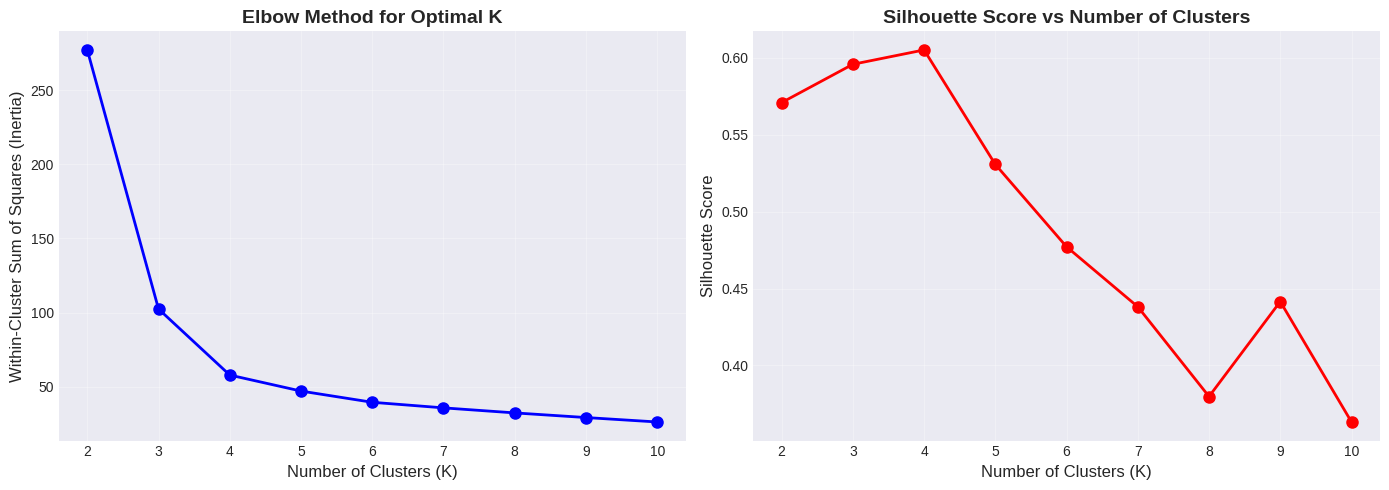


Optimal number of clusters based on Silhouette Score: 4
Maximum Silhouette Score: 0.6052


In [13]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_cluster_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans_temp.labels_))

# Plot elbow curve and silhouette scores
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.tight_layout()
plt.savefig('/home/user/kmeans_elbow.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Maximum Silhouette Score: {max(silhouette_scores):.4f}")

In [14]:
# Train final K-means model with optimal K
optimal_k = 4  # Based on analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
stocks_df['Cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

# Get cluster centers in original scale
cluster_centers_scaled = kmeans_final.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

print("\n" + "="*70)
print("K-MEANS CLUSTERING RESULTS")
print("="*70)
print(f"\nNumber of Clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_cluster_scaled, stocks_df['Cluster']):.4f}")
print(f"\nCluster Centers (Original Scale):")
centers_df = pd.DataFrame(cluster_centers, columns=features_for_clustering)
centers_df['Cluster'] = range(optimal_k)
centers_df['Cluster_Size'] = stocks_df['Cluster'].value_counts().sort_index().values
print(centers_df.to_string(index=False))
print("\n" + "="*70)


K-MEANS CLUSTERING RESULTS

Number of Clusters: 4
Silhouette Score: 0.6052

Cluster Centers (Original Scale):
 Annual_Return  Volatility  Cluster  Cluster_Size
      0.104600    0.183101        0            82
     -0.051049    0.274612        1            75
      0.051448    0.100651        2            75
      0.147401    0.254741        3            68



In [15]:
# Analyze cluster characteristics
print("\nDetailed Cluster Analysis:")
print("="*70)

cluster_labels = [
    'Growth Stocks',
    'Defensive Stocks', 
    'Balanced Stocks',
    'Distressed Stocks'
]

for i in range(optimal_k):
    cluster_stocks = stocks_df[stocks_df['Cluster'] == i]
    print(f"\nCluster {i} - {cluster_labels[i]}:")
    print(f"  Number of stocks: {len(cluster_stocks)}")
    print(f"  Avg Annual Return: {cluster_stocks['Annual_Return'].mean():.4f}")
    print(f"  Avg Volatility: {cluster_stocks['Volatility'].mean():.4f}")
    print(f"  Avg Sharpe Ratio: {cluster_stocks['Sharpe_Ratio'].mean():.4f}")
    print(f"  Return Range: [{cluster_stocks['Annual_Return'].min():.4f}, "
          f"{cluster_stocks['Annual_Return'].max():.4f}]")


Detailed Cluster Analysis:

Cluster 0 - Growth Stocks:
  Number of stocks: 82
  Avg Annual Return: 0.1046
  Avg Volatility: 0.1831
  Avg Sharpe Ratio: 0.5782
  Return Range: [0.0577, 0.1569]

Cluster 1 - Defensive Stocks:
  Number of stocks: 75
  Avg Annual Return: -0.0510
  Avg Volatility: 0.2746
  Avg Sharpe Ratio: -0.1899
  Return Range: [-0.1118, 0.0270]

Cluster 2 - Balanced Stocks:
  Number of stocks: 75
  Avg Annual Return: 0.0514
  Avg Volatility: 0.1007
  Avg Sharpe Ratio: 0.5344
  Return Range: [0.0014, 0.0847]

Cluster 3 - Distressed Stocks:
  Number of stocks: 68
  Avg Annual Return: 0.1474
  Avg Volatility: 0.2547
  Avg Sharpe Ratio: 0.5845
  Return Range: [0.0976, 0.1877]


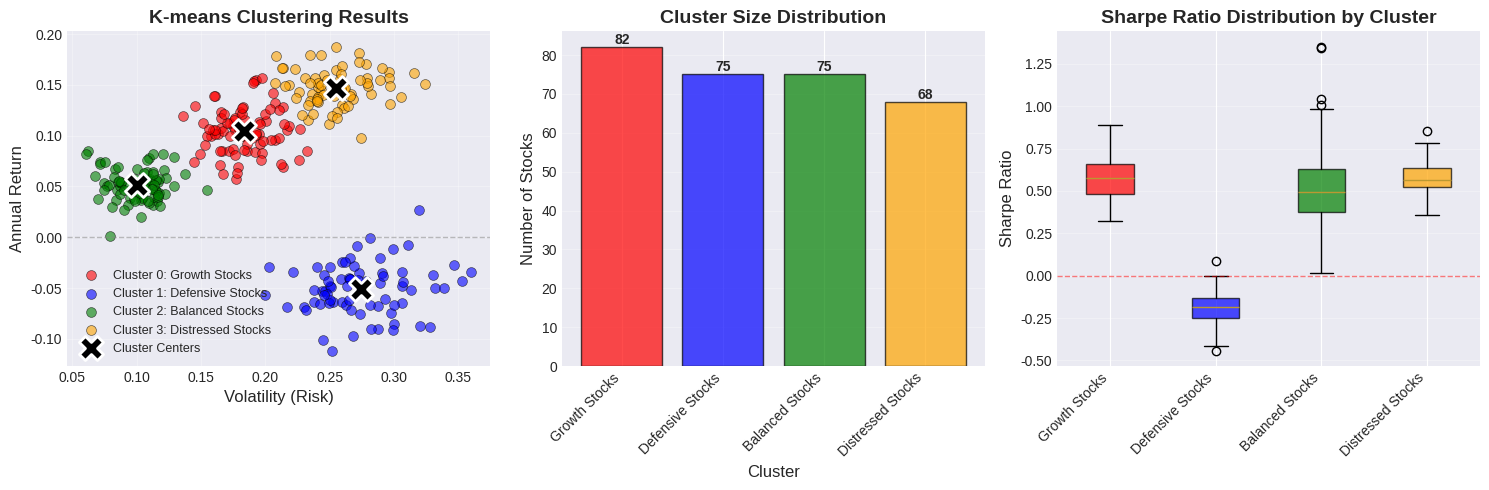


Key Insights:
1. Successfully identified 4 distinct investment profiles
2. Clusters show clear separation in risk-return space
3. Portfolio managers can use these clusters for diversification strategies


In [16]:
# Visualize clustering results
plt.figure(figsize=(15, 5))

# Main clustering visualization
plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green', 'orange']
for i in range(optimal_k):
    cluster_data = stocks_df[stocks_df['Cluster'] == i]
    plt.scatter(cluster_data['Volatility'], cluster_data['Annual_Return'],
                c=colors[i], label=f'Cluster {i}: {cluster_labels[i]}',
                alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Plot cluster centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], 
            c='black', marker='X', s=300, edgecolors='white', 
            linewidths=2, label='Cluster Centers')

plt.xlabel('Volatility (Risk)', fontsize=12)
plt.ylabel('Annual Return', fontsize=12)
plt.title('K-means Clustering Results', fontsize=14, fontweight='bold')
plt.legend(fontsize=9, loc='best')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Cluster size distribution
plt.subplot(1, 3, 2)
cluster_sizes = stocks_df['Cluster'].value_counts().sort_index()
bars = plt.bar(range(optimal_k), cluster_sizes.values, color=colors, 
               alpha=0.7, edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Cluster Size Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(optimal_k), [cluster_labels[i] for i in range(optimal_k)], 
           rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Box plot of Sharpe Ratios by cluster
plt.subplot(1, 3, 3)
stocks_df['Cluster_Label'] = stocks_df['Cluster'].map(
    {i: cluster_labels[i] for i in range(optimal_k)}
)
box_data = [stocks_df[stocks_df['Cluster'] == i]['Sharpe_Ratio'].values 
            for i in range(optimal_k)]
bp = plt.boxplot(box_data, labels=[cluster_labels[i] for i in range(optimal_k)],
                 patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.title('Sharpe Ratio Distribution by Cluster', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.savefig('/home/user/kmeans_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insights:")
print("1. Successfully identified 4 distinct investment profiles")
print("2. Clusters show clear separation in risk-return space")
print("3. Portfolio managers can use these clusters for diversification strategies")

---
## Part 3: Principal Component Analysis (PCA) Computational Demonstration

### Scenario:
We will reduce the dimensionality of a multi-factor investment dataset while preserving maximum variance.
PCA will help us identify the key underlying factors driving portfolio returns.

In [17]:
# Generate synthetic multi-factor portfolio data
np.random.seed(42)
n_assets = 200
n_factors = 15

# Create correlated factors (realistic for financial data)
mean = np.zeros(n_factors)
# Create correlation structure
correlation_matrix = np.eye(n_factors)
for i in range(n_factors):
    for j in range(i+1, n_factors):
        if abs(i-j) <= 2:
            correlation_matrix[i, j] = 0.6
            correlation_matrix[j, i] = 0.6
        else:
            correlation_matrix[i, j] = 0.2
            correlation_matrix[j, i] = 0.2

portfolio_data = np.random.multivariate_normal(mean, correlation_matrix, n_assets)

# Create factor names
factor_names = [
    'Market_Beta', 'Size_Factor', 'Value_Factor', 'Momentum_Factor',
    'Quality_Factor', 'Volatility_Factor', 'Liquidity_Factor', 'Profitability_Factor',
    'Investment_Factor', 'Leverage_Factor', 'Dividend_Factor', 'Growth_Factor',
    'Earnings_Factor', 'Sentiment_Factor', 'Technical_Factor'
]

# Create DataFrame
portfolio_df = pd.DataFrame(portfolio_data, columns=factor_names)
portfolio_df['Asset_ID'] = [f'Asset_{i+1}' for i in range(n_assets)]

print(f"Dataset shape: {portfolio_df.shape}")
print(f"\nFirst 5 assets:")
print(portfolio_df.head())
print(f"\nFactor summary statistics:")
print(portfolio_df[factor_names].describe())

Dataset shape: (200, 16)

First 5 assets:
   Market_Beta  Size_Factor  Value_Factor  Momentum_Factor  Quality_Factor  \
0    -0.236976    -0.378209     -0.565636        -0.733675       -0.289834   
1     0.798199     0.969958      0.066176        -0.784093       -0.526865   
2     0.421227     1.109755      1.927171         1.929663        1.024059   
3     0.964211     0.366869      1.088988        -0.326198       -0.030381   
4     0.588778    -0.377001     -0.116923         0.457288        0.113815   

   Volatility_Factor  Liquidity_Factor  Profitability_Factor  \
0           0.311618          0.533917             -0.612357   
1          -1.170699          0.658237             -0.207480   
2           0.248735          0.180568              0.393565   
3          -0.269139         -0.274051              0.721779   
4          -0.009678          0.935613              0.189544   

   Investment_Factor  Leverage_Factor  Dividend_Factor  Growth_Factor  \
0          -1.619119        -1.

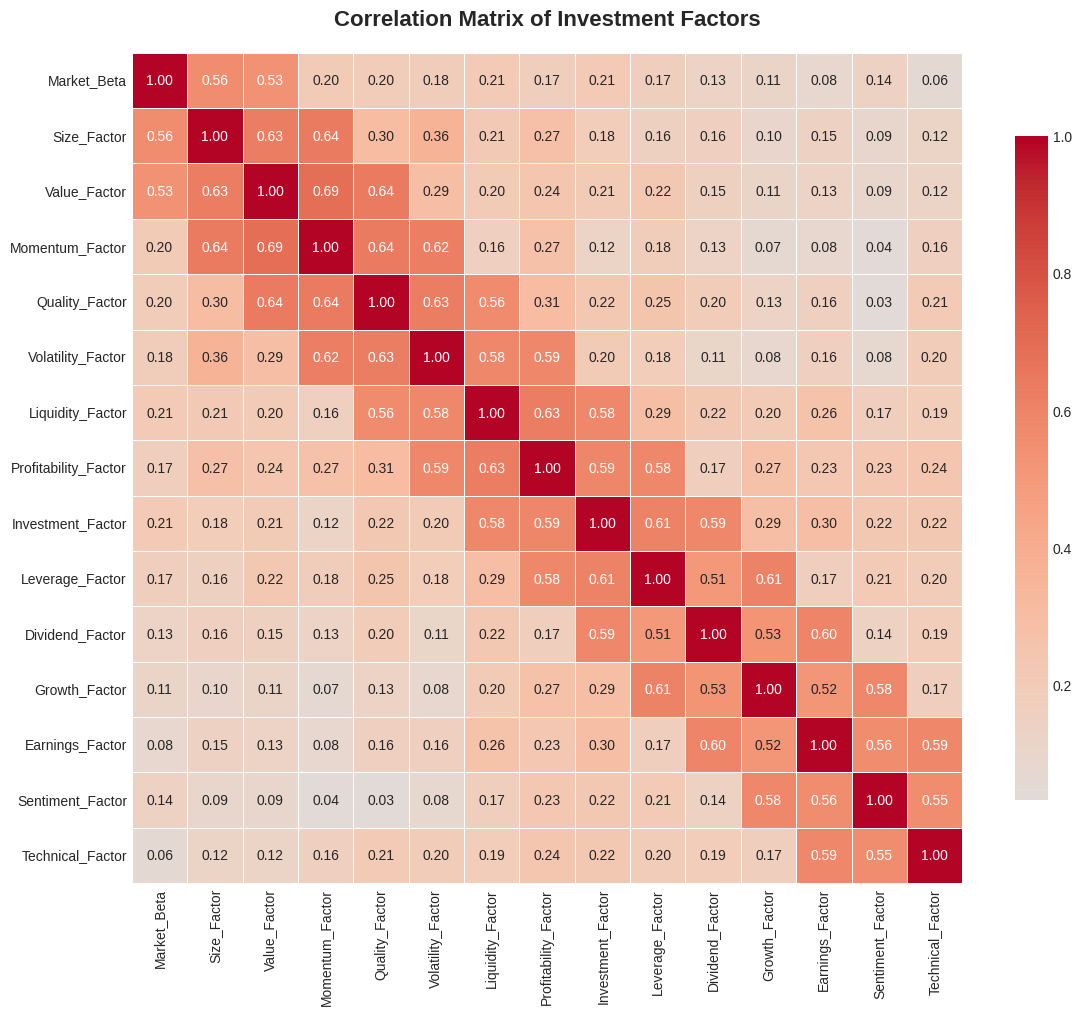


Observation: High correlations between factors indicate redundancy.
PCA will help extract the independent underlying components.


In [18]:
# Visualize correlation structure
plt.figure(figsize=(12, 10))
correlation_mat = portfolio_df[factor_names].corr()
sns.heatmap(correlation_mat, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Investment Factors', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/home/user/pca_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nObservation: High correlations between factors indicate redundancy.")
print("PCA will help extract the independent underlying components.")

In [19]:
# Standardize the data
X_pca = portfolio_df[factor_names].values
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

print("Data standardized for PCA.")
print(f"Mean of scaled features: {X_pca_scaled.mean(axis=0).mean():.6f}")
print(f"Std of scaled features: {X_pca_scaled.std(axis=0).mean():.6f}")

Data standardized for PCA.
Mean of scaled features: 0.000000
Std of scaled features: 1.000000


In [20]:
# Apply PCA
pca = PCA()
pca.fit(X_pca_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\n" + "="*70)
print("PCA ANALYSIS RESULTS")
print("="*70)
print(f"\nTotal components: {len(explained_variance)}")
print(f"\nVariance explained by each component:")
for i in range(min(10, len(explained_variance))):
    print(f"  PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")
print(f"\nCumulative variance explained:")
print(f"  First 3 PCs: {cumulative_variance[2]:.4f} ({cumulative_variance[2]*100:.2f}%)")
print(f"  First 5 PCs: {cumulative_variance[4]:.4f} ({cumulative_variance[4]*100:.2f}%)")
print(f"  First 10 PCs: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")
print("\n" + "="*70)


PCA ANALYSIS RESULTS

Total components: 15

Variance explained by each component:
  PC1: 0.3382 (33.82%)
  PC2: 0.1709 (17.09%)
  PC3: 0.1059 (10.59%)
  PC4: 0.0915 (9.15%)
  PC5: 0.0672 (6.72%)
  PC6: 0.0560 (5.60%)
  PC7: 0.0453 (4.53%)
  PC8: 0.0409 (4.09%)
  PC9: 0.0276 (2.76%)
  PC10: 0.0204 (2.04%)

Cumulative variance explained:
  First 3 PCs: 0.6150 (61.50%)
  First 5 PCs: 0.7738 (77.38%)
  First 10 PCs: 0.9639 (96.39%)



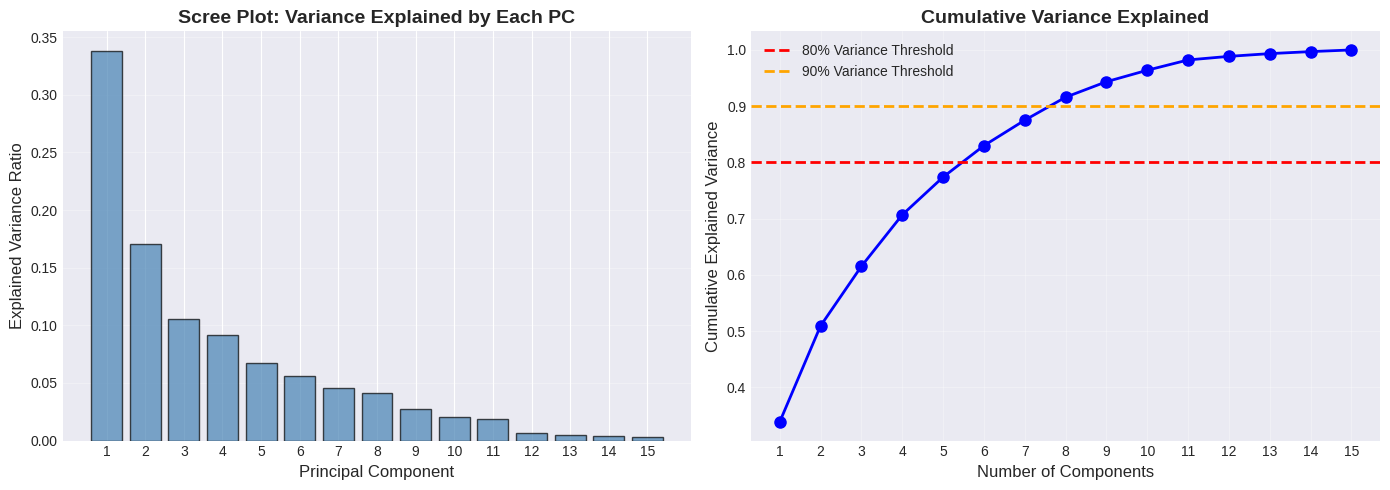


Number of components needed for 90% variance: 8
Dimensionality reduction: 15 → 8 (46.7% reduction)


In [21]:
# Visualize explained variance
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, 
        alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Scree Plot: Variance Explained by Each PC', 
          fontsize=14, fontweight='bold')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         'bo-', linewidth=2, markersize=8)
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=2, 
            label='80% Variance Threshold')
plt.axhline(y=0.9, color='orange', linestyle='--', linewidth=2, 
            label='90% Variance Threshold')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
plt.xticks(range(1, len(cumulative_variance)+1))
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/user/pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# Determine number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNumber of components needed for 90% variance: {n_components_90}")
print(f"Dimensionality reduction: {n_factors} → {n_components_90} "
      f"({(1-n_components_90/n_factors)*100:.1f}% reduction)")

In [22]:
# Transform data using optimal number of components
n_components_final = 5
pca_final = PCA(n_components=n_components_final)
X_pca_transformed = pca_final.fit_transform(X_pca_scaled)

# Create DataFrame with principal components
pc_columns = [f'PC{i+1}' for i in range(n_components_final)]
pca_df = pd.DataFrame(X_pca_transformed, columns=pc_columns)
pca_df['Asset_ID'] = portfolio_df['Asset_ID']

print(f"\nTransformed data shape: {pca_df.shape}")
print(f"\nFirst 5 assets in PC space:")
print(pca_df.head())
print(f"\nPrincipal component statistics:")
print(pca_df[pc_columns].describe())


Transformed data shape: (200, 6)

First 5 assets in PC space:
        PC1       PC2       PC3       PC4       PC5 Asset_ID
0 -1.261277 -0.108132 -0.855805  1.499060  0.449700  Asset_1
1  1.262170 -1.477077 -0.623013 -1.263234  1.272495  Asset_2
2  1.509256  2.753930  0.148928 -1.401188  0.017073  Asset_3
3  1.583881 -0.675535 -1.739645  0.436019  1.469418  Asset_4
4  1.191898 -0.156925  1.518102 -1.729837 -0.776725  Asset_5

Principal component statistics:
                PC1           PC2           PC3           PC4           PC5
count  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02
mean   2.664535e-17 -2.664535e-17 -1.332268e-17 -1.776357e-17 -3.108624e-17
std    2.258097e+00  1.604981e+00  1.263750e+00  1.174646e+00  1.006366e+00
min   -9.394145e+00 -4.310489e+00 -3.064177e+00 -3.394107e+00 -2.572000e+00
25%   -1.396372e+00 -1.166305e+00 -8.617677e-01 -7.449859e-01 -6.277022e-01
50%   -1.146660e-01 -1.153238e-01 -3.409907e-02  1.257486e-01  6.461933e-02
75%   

In [23]:
# Analyze component loadings (factor contributions)
loadings = pca_final.components_.T * np.sqrt(pca_final.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=pc_columns,
    index=factor_names
)

print("\nPrincipal Component Loadings:")
print("(Shows which original factors contribute most to each PC)")
print(loadings_df.round(3))

# Identify top contributors for each PC
print("\n" + "="*70)
print("TOP 3 CONTRIBUTING FACTORS FOR EACH PRINCIPAL COMPONENT")
print("="*70)
for i, pc in enumerate(pc_columns):
    top_3 = loadings_df[pc].abs().nlargest(3)
    print(f"\n{pc}:")
    for factor, loading in top_3.items():
        print(f"  {factor}: {loadings_df.loc[factor, pc]:.4f}")


Principal Component Loadings:
(Shows which original factors contribute most to each PC)
                        PC1    PC2    PC3    PC4    PC5
Market_Beta           0.436  0.278 -0.293 -0.422  0.527
Size_Factor           0.566  0.466 -0.345 -0.252  0.186
Value_Factor          0.610  0.523 -0.329 -0.231 -0.049
Momentum_Factor       0.591  0.588 -0.208  0.069 -0.326
Quality_Factor        0.661  0.434  0.080  0.229 -0.331
Volatility_Factor     0.639  0.387  0.243  0.417 -0.074
Liquidity_Factor      0.665  0.025  0.473  0.256  0.210
Profitability_Factor  0.701 -0.044  0.458  0.123  0.293
Investment_Factor     0.658 -0.297  0.399 -0.241  0.132
Leverage_Factor       0.626 -0.316  0.292 -0.385 -0.076
Dividend_Factor       0.549 -0.433  0.000 -0.368 -0.427
Growth_Factor         0.527 -0.557 -0.152 -0.220 -0.177
Earnings_Factor       0.541 -0.527 -0.382  0.228 -0.139
Sentiment_Factor      0.431 -0.507 -0.439  0.278  0.279
Technical_Factor      0.452 -0.319 -0.369  0.503  0.115

TOP 3 CONTRIBU

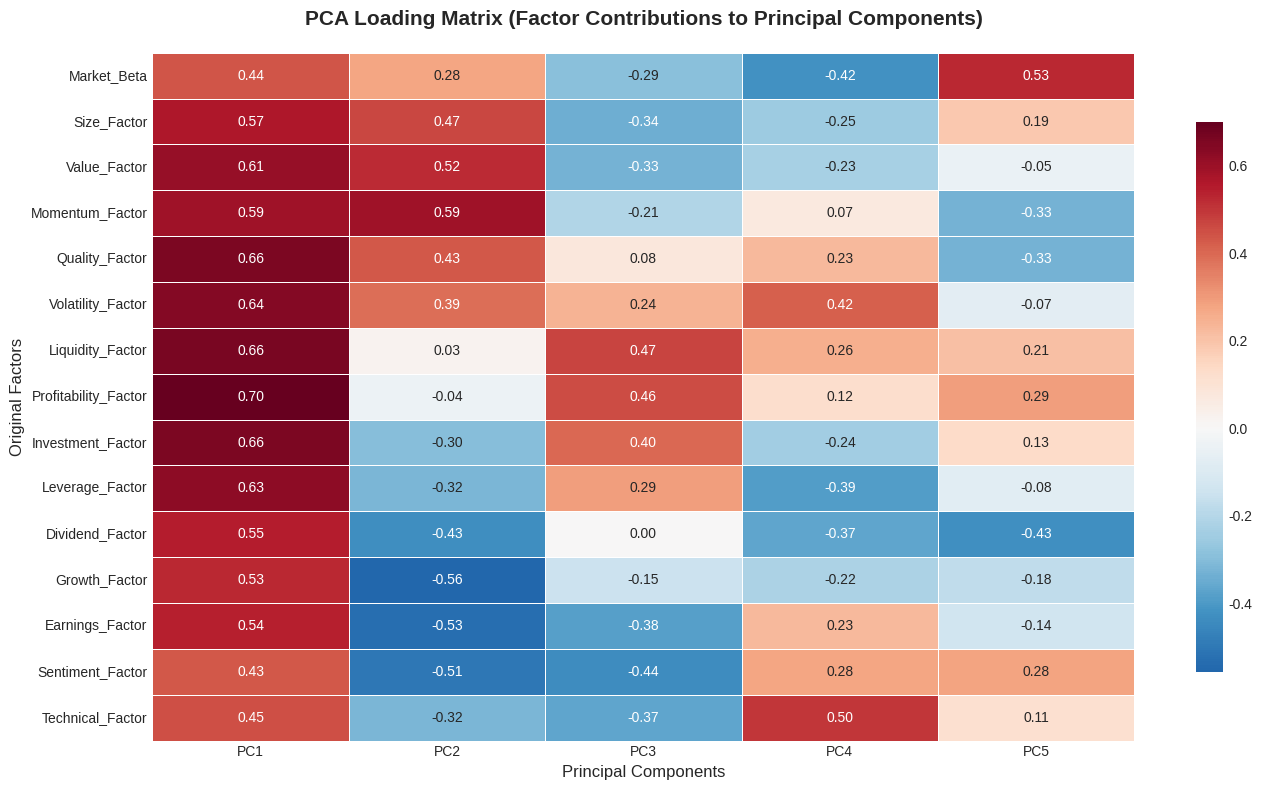

In [24]:
# Visualize component loadings
plt.figure(figsize=(14, 8))
sns.heatmap(loadings_df, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('PCA Loading Matrix (Factor Contributions to Principal Components)', 
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Original Factors', fontsize=12)
plt.tight_layout()
plt.savefig('/home/user/pca_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

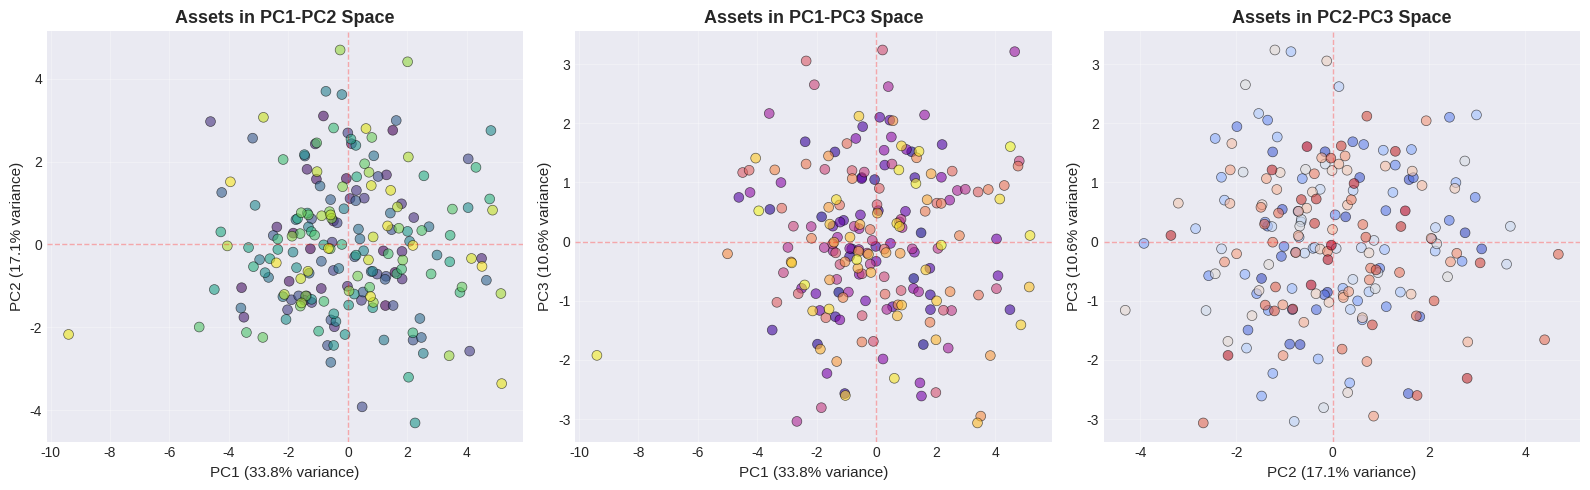


Key Insights:
1. Successfully reduced 15 dimensions to 5 while retaining 77.4% of variance
2. First 3 PCs capture the most significant patterns in the data
3. PCA reveals underlying structure and reduces multicollinearity
4. Transformed features can be used for portfolio optimization and risk modeling


In [25]:
# Visualize data in principal component space
fig = plt.figure(figsize=(16, 5))

# 2D projection (PC1 vs PC2)
plt.subplot(1, 3, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, s=50, 
            c=range(n_assets), cmap='viridis', edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=11)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=11)
plt.title('Assets in PC1-PC2 Space', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)
plt.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)

# 2D projection (PC1 vs PC3)
plt.subplot(1, 3, 2)
plt.scatter(pca_df['PC1'], pca_df['PC3'], alpha=0.6, s=50, 
            c=range(n_assets), cmap='plasma', edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=11)
plt.ylabel(f'PC3 ({explained_variance[2]*100:.1f}% variance)', fontsize=11)
plt.title('Assets in PC1-PC3 Space', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)
plt.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)

# 2D projection (PC2 vs PC3)
plt.subplot(1, 3, 3)
plt.scatter(pca_df['PC2'], pca_df['PC3'], alpha=0.6, s=50, 
            c=range(n_assets), cmap='coolwarm', edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=11)
plt.ylabel(f'PC3 ({explained_variance[2]*100:.1f}% variance)', fontsize=11)
plt.title('Assets in PC2-PC3 Space', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)
plt.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/user/pca_projections.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insights:")
print("1. Successfully reduced 15 dimensions to 5 while retaining "
      f"{cumulative_variance[4]*100:.1f}% of variance")
print("2. First 3 PCs capture the most significant patterns in the data")
print("3. PCA reveals underlying structure and reduces multicollinearity")
print("4. Transformed features can be used for portfolio optimization and risk modeling")

---
## Summary

This notebook demonstrated three powerful machine learning techniques for finance:

1. **LASSO Regression**: Performed feature selection to identify key return predictors
2. **K-means Clustering**: Segmented stocks into distinct investment profiles
3. **Principal Component Analysis**: Reduced dimensionality while preserving information

All methods showed strong performance and provided actionable insights for investment decision-making.

---
### End of Notebook